# The Sunyaev-Zeldovich signal for a single pointing

## Thermal and kinematic effect

In this notebook we take a look at the generation of SZ signals. In this particular section, we take a look at how to generate thermal (tSZ) and kinematic (kSZ) signals. We show the signal for a couple of electron temperatures and fix the optical depth to 0.01. We set the peculiar velocity of the cluster to 1000 km / s. Note that the velocity in `MockSZ` is oriented outwards, i.e. a positive velocity implies a cluster moving away from us. We plot the signals in units of MJy / sr, which means we have to convert the signal returned by `MockSZ`, which is in SI units, by passing it through a conversion function.

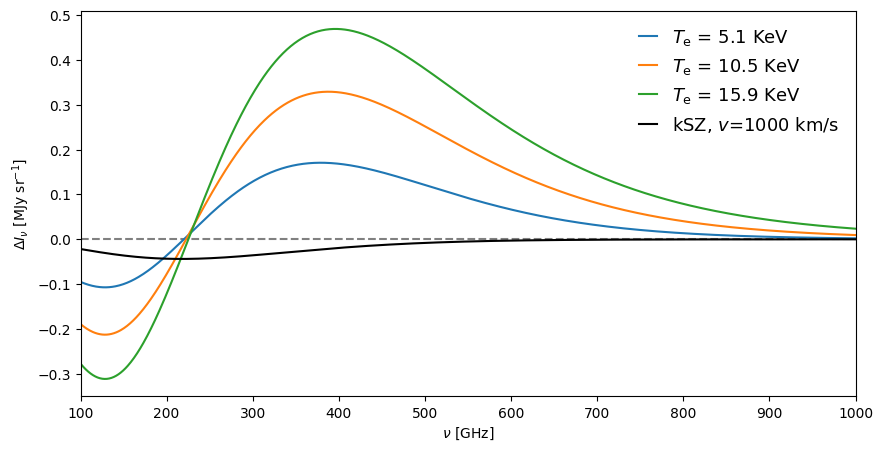

In [1]:
import matplotlib
import os

import numpy as np
import matplotlib.pyplot as pt

import MockSZ.Models as MModels
import MockSZ.Conversions as MConv

%matplotlib inline

Te = np.linspace(5.1, 15.9, 3)

numin = 100
numax = 1000

tau_e = 0.01
num_arr = 1000
nu = np.linspace(numin, numax, num=num_arr) * 1e9
nu_plot = nu * 1e-9

v_pec = 1000

fig, ax = pt.subplots(1,1, figsize=(10, 5))

for i in Te:
    simObj_tSZ = MModels.SinglePointing(param=i, tau_e=tau_e, no_CMB=True)
    tSZ = simObj_tSZ.getSingleSignal_tkSZ(nu)
    tSZ_MJy = MConv.SI_JySr(tSZ) * 1e-6
    
    label = r"$T_\mathrm{e}$" + f" = {i:.1f} KeV"
    
    ax.plot(nu_plot,tSZ_MJy, label=label)

simObj_kSZ = MModels.SinglePointing(v_pec=v_pec, tau_e=tau_e, no_CMB=True)
kSZ = simObj_kSZ.getSingleSignal_tkSZ(nu)
kSZ_MJy = MConv.SI_JySr(kSZ) * 1e-6

label = r"kSZ, $v$={} km/s".format(v_pec, Te[-1])
    
ax.plot(nu_plot, kSZ_MJy, color="black", label=label)

ax.axhline(y=0, zorder=0, color="grey", ls="dashed")
ax.set_xlim(numin, numax)

ax.set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
ax.set_xlabel(r"$\nu$ [GHz]")

ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

Note that we had to create two models, one for the tSZ curves and one for the kSZ curve. We do this because `MockSZ` automatically generates the combined SZ effect because of the cross-terms. Therefore, if one wants just a tSZ signal, the 'v_pec' parameter should not be passed. Similarly, for a pure kSZ signal, the 'param' parameter should not be passed. We stress that for regular usage, one should simply generate the combined signal, because this includes the cross-terms. For more information on these separate terms, we refer to the 'deep dives' section of the documentation.

## Nonthermal effect

In addition to the thermal and kinematic SZ effect, `MockSZ` can also calculate the SZ effect due to a nonthermal population of electrons, which we label the ntSZ effect. The used distribution is a powerlaw. This type of signal is of interest, because electrons in, for example, relativistic AGN jets are distributed according to a powerlaw.

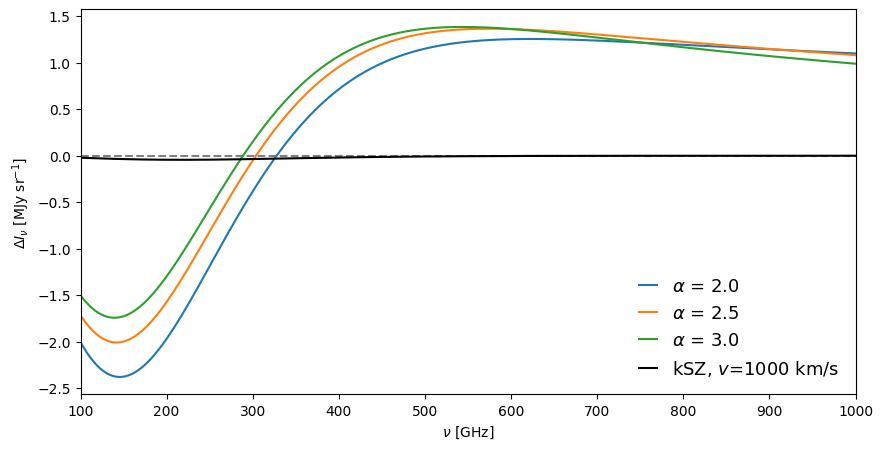

In [2]:
alpha = np.array([2, 2.5, 3])

fig, ax = pt.subplots(1,1, figsize=(10, 5))

for i in alpha:
    simObj = MModels.SinglePointing(param=i, tau_e=tau_e, no_CMB=True)
    ntSZ = simObj.getSingleSignal_ntkSZ(nu)
    ntSZ_MJy = MConv.SI_JySr(ntSZ) * 1e-6
    
    label = r"$\alpha$" + f" = {i:.1f}"
    
    ax.plot(nu_plot, ntSZ_MJy, label=label)

label = r"kSZ, $v$={} km/s".format(v_pec)
ax.plot(nu_plot, kSZ_MJy, color="black", label=label)

ax.axhline(y=0, zorder=0, color="grey", ls="dashed")
ax.set_xlim(numin, numax)

ax.set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
ax.set_xlabel(r"$\nu$ [GHz]")

ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

Note how the high-frequency part of the signal extends significantly farther than the tSZ effect. This is due to the scattering kernel of the ntSZ effect having a longer upscattering tail, as can be seen in the notebook on scattering kernels, which can be found in the 'deep dives' section.